In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [2]:
datasets_folder = "\\".join(os.getcwd().split('\\')[:-1]) + "\\datasets\\"
datasets_folder

'E:\\Github\\PML_Project\\datasets\\'

In [3]:
df = pd.read_csv(datasets_folder+'cardio_train.csv',sep=';').set_index('id')

In [4]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


We will try to normalize **gender** column by making 0 -> Women and 1 -> Men 

In [5]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 1 else 0 )

In [6]:
df['chol_2'] = df['cholesterol'].apply(lambda x: 1 if x == 2 else 0)
df['chol_3'] = df['cholesterol'].apply(lambda x: 1 if x == 3 else 0)
df.drop('cholesterol',axis=1,inplace=True)

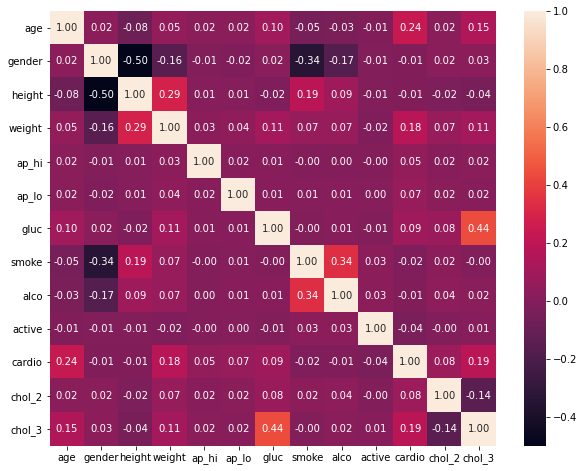

In [7]:
fig,heatMP = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='1.2f',ax=heatMP);

<AxesSubplot:xlabel='cardio', ylabel='count'>

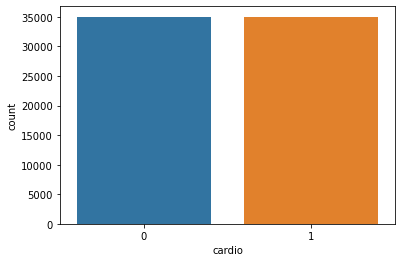

In [8]:
sns.countplot(x='cardio',data=df,)

In [9]:
df.groupby(by=['cardio','gender'])['gender'].count()

cardio  gender
0       0         12107
        1         22914
1       0         12363
        1         22616
Name: gender, dtype: int64

In [10]:
df.gender.value_counts()

1    45530
0    24470
Name: gender, dtype: int64

<AxesSubplot:ylabel='cardio'>

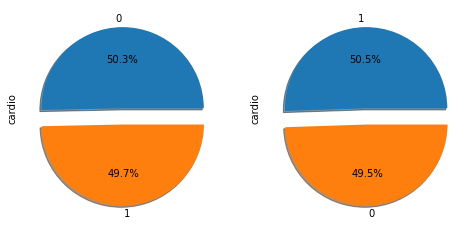

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,5))
df['cardio'][df['gender']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['cardio'][df['gender']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

# Let's get into some bull shit

In [12]:
print('Original shape :',df.shape)

Original shape : (70000, 13)


In [13]:
df_train , df_test = train_test_split(df,test_size=0.2,random_state=42)

In [14]:
print('DF Train :',df_train.shape)
print('DF Test  :',df_test.shape)

DF Train : (56000, 13)
DF Test  : (14000, 13)


In [15]:
df

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,chol_2,chol_3
id,,,,,,,,,,,,,
0,18393,0,168,62.0,110,80,1,0,0,1,0,0,0
1,20228,1,156,85.0,140,90,1,0,0,1,1,0,1
2,18857,1,165,64.0,130,70,1,0,0,0,1,0,1
3,17623,0,169,82.0,150,100,1,0,0,1,1,0,0
4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,0,168,76.0,120,80,1,1,0,1,0,0,0
99995,22601,1,158,126.0,140,90,2,0,0,1,1,1,0
99996,19066,0,183,105.0,180,90,1,0,1,0,1,0,1


# Dataset Scaling using Sklearn StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df_train.drop('cardio',axis=1))

StandardScaler()

In [19]:
scaled_features = scaler.transform(df_train.drop('cardio',axis=1))
df_train_sc = pd.DataFrame(data=scaled_features,columns=df_train.columns.drop('cardio'))

In [20]:
scaled_features = scaler.transform(df_test.drop('cardio',axis=1))
df_test_sc = pd.DataFrame(data=scaled_features,columns=df_test.columns.drop('cardio'))

# Splitting of Training and even Scaled data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Full / Entire Data - Non Scaled Data
X_train_all , Y_train_all = df_train.drop('cardio',axis=1) , df_train.cardio
X_test_all , Y_test_all = df_test.drop('cardio',axis=1) , df_test.cardio

# Full / Entire Data - Scaled Data
X_train_all_sc , Y_train_all_sc = df_train_sc , df_train.cardio
X_test_all_sc , Y_test_all_sc = df_test_sc , df_train.cardio

# for Dev and Validation sets 
# Non Scaled Data
df_train_DEV , df_train_Validation = train_test_split(df_train,test_size=0.1,random_state=7)
X_train , Y_train = df_train_DEV.drop('cardio',axis=1) , df_train_DEV.cardio
X_test , Y_test = df_train_Validation.drop('cardio',axis=1) , df_train_Validation.cardio

# Scaled Data
X_train_sc , X_test_sc = train_test_split(df_train_sc,test_size=0.1,random_state=7)
Y_train_sc , Y_test_sc = train_test_split(df_train.cardio,test_size=0.1,random_state=7)

# Machine Learning Algorithms

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train_sc,Y_train_sc)
pred_logreg = logreg.predict(X_test_sc)

In [26]:
print(confusion_matrix(Y_test_sc,pred_logreg))
print(classification_report(Y_test_sc,pred_logreg))
print(accuracy_score(Y_test_sc,pred_logreg))

[[2176  651]
 [ 937 1836]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      2827
           1       0.74      0.66      0.70      2773

    accuracy                           0.72      5600
   macro avg       0.72      0.72      0.72      5600
weighted avg       0.72      0.72      0.72      5600

0.7164285714285714


## Gaussian Naive Bayes 

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gnb = GaussianNB()
gnb.fit(X_train_sc,Y_train_sc)
pred_gnb = gnb.predict(X_test_sc)

In [29]:
print(confusion_matrix(Y_test_sc,pred_gnb))
print(classification_report(Y_test_sc,pred_gnb))
print(accuracy_score(Y_test_sc,pred_gnb))

[[2465  362]
 [1820  953]]
              precision    recall  f1-score   support

           0       0.58      0.87      0.69      2827
           1       0.72      0.34      0.47      2773

    accuracy                           0.61      5600
   macro avg       0.65      0.61      0.58      5600
weighted avg       0.65      0.61      0.58      5600

0.6103571428571428


## K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#### Default Mode : K -> 5

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,Y_train_sc)
pred_knn = knn.predict(X_test_sc)

In [32]:
print(confusion_matrix(Y_test_sc,pred_knn))
print(classification_report(Y_test_sc,pred_knn))
print(accuracy_score(Y_test_sc,pred_knn))

[[1894  933]
 [1065 1708]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2827
           1       0.65      0.62      0.63      2773

    accuracy                           0.64      5600
   macro avg       0.64      0.64      0.64      5600
weighted avg       0.64      0.64      0.64      5600

0.6432142857142857


### Iteration Mode : k -> List

In [33]:
Scores = {}
for k in [1,5,10,25,50,75,100,250,500,1000]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,Y_train_sc)
    pred_knn = knn.predict(X_test_sc)
    Scores[k] = accuracy_score(Y_test_sc,pred_knn)

In [34]:
Score_table = pd.DataFrame(Scores.values(),index=Scores.keys(),columns=['Accuracy'])

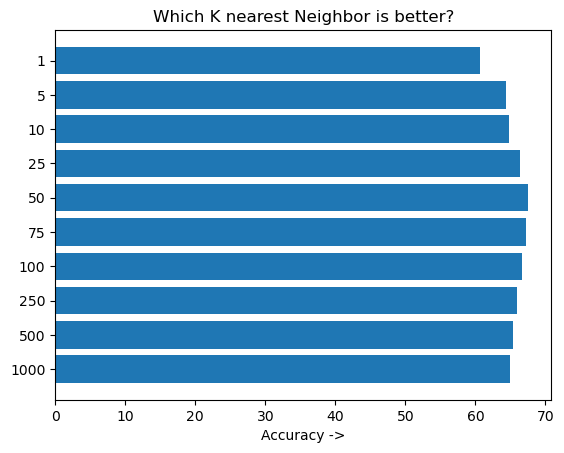

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(range(len(Score_table)), Score_table.Accuracy*100, align='center')
ax.set_yticks(range(len(Score_table)))
ax.set_yticklabels(Score_table.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy ->')
ax.set_title('Which K nearest Neighbor is better?')

plt.show()

## SVM Classifier

In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC(gamma=0.1,C=100)

In [ ]:
svc.fit(X_train_sc,Y_train_sc)

In [ ]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(Y_test_sc,pred_svc))
print(classification_report(Y_test_sc,pred_svc))
print(accuracy_score(Y_test_sc,pred_svc))